## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

## Load and Inspect the Data

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis (EDA)

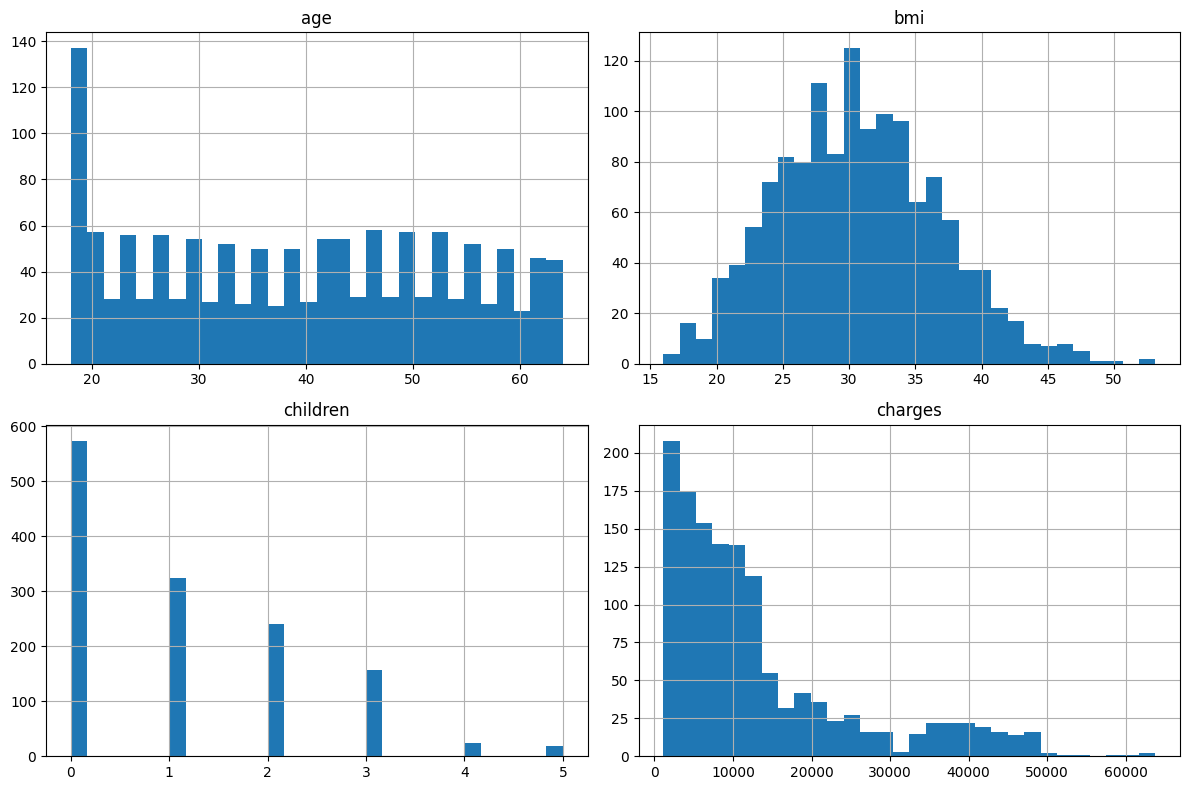

In [ ]:
# Histogram for continuous features
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


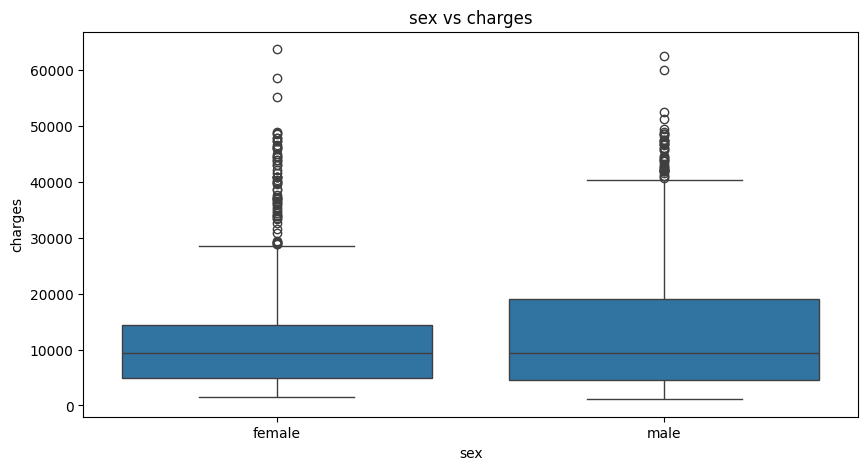

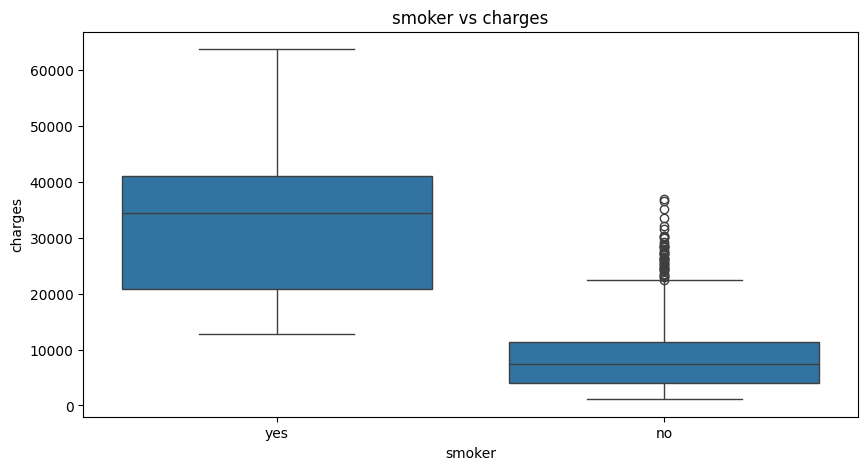

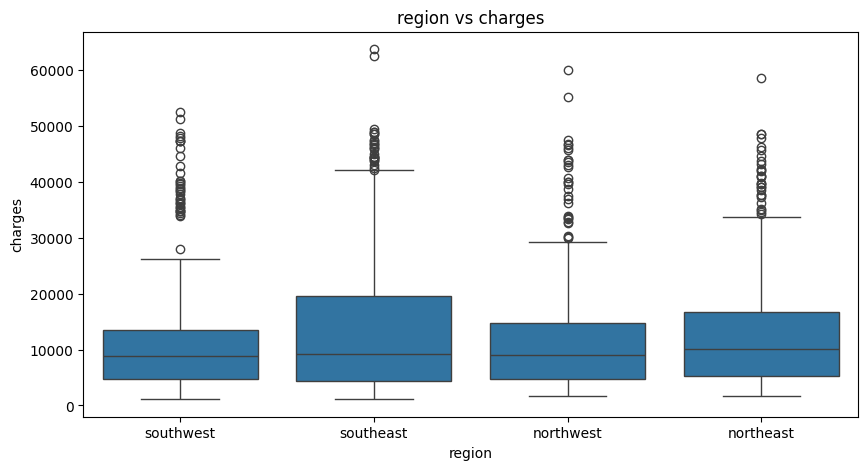

In [ ]:
for col in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'{col} vs charges')
    plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

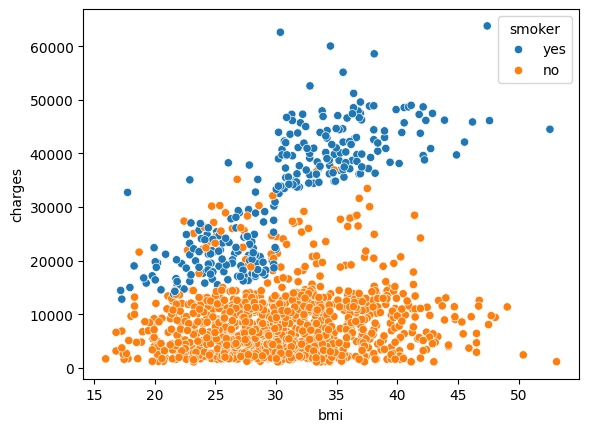

In [ ]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)

### Insights:
- Smokers with high bmi are paying the most

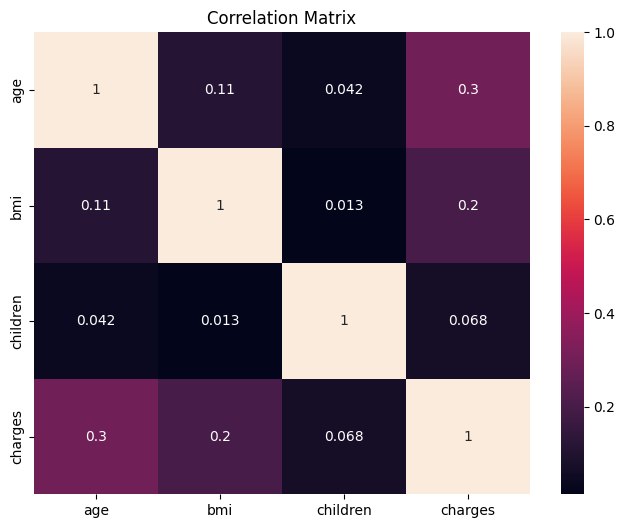

In [ ]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

# DATA PREPROCESSING

## Applying log transformation to Charges as it is right skewed

<Axes: xlabel='charges', ylabel='Count'>

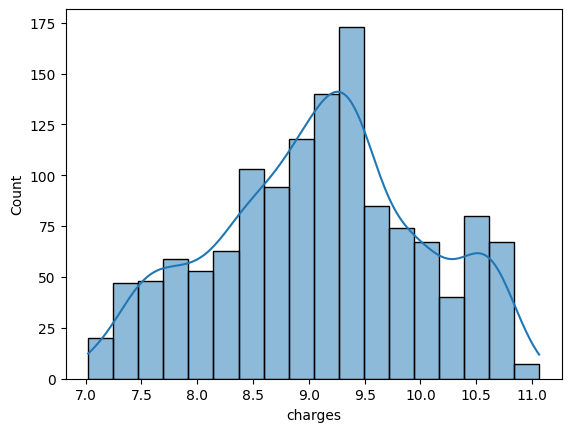

In [ ]:
df['charges'] = np.log1p(df['charges'])
sns.histplot(x='charges', data=df, kde=True)

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

## Checking missing values

In [55]:
X.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

No missing vals ✔️

## Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encoding & Scaling

In [ ]:
# Separate categorical and numerical columns
cat_cols = ['sex', 'smoker', 'region']
num_cols = ['age', 'bmi', 'children']

# Preprocessor
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), cat_cols),
    ('scaler', StandardScaler(), num_cols)
])


## Building Pipeline

In [ ]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])


## Train the Model

In [59]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('scaler', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', LinearRegression())])

## Make Predictions and Evaluate

In [60]:
y_pred = pipeline.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.8047410791393026
RMSE: 0.41893807245606973


## Visualization – Actual vs Predicted

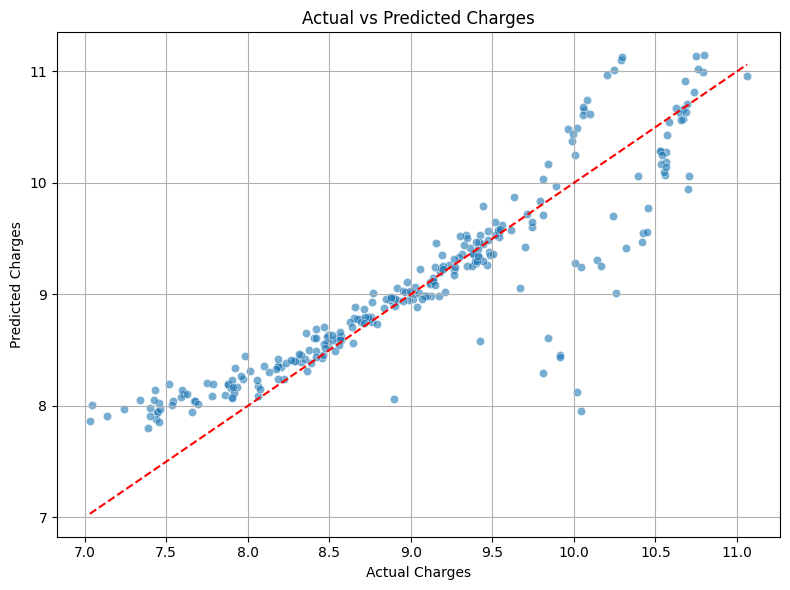

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.tight_layout()
plt.show()